In [161]:
from huggingface_hub import login, logout
import os

login(os.getenv("HF_TOKEN"))  # displays a widget in a notebook, a prompt in terminal otherwise



Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [162]:
from datasets import load_dataset

ds = load_dataset("imagefolder", data_dir="Data_test/Rocks")
ds

Resolving data files:   0%|          | 0/249 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/34 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/32 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 249
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 34
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 32
    })
})

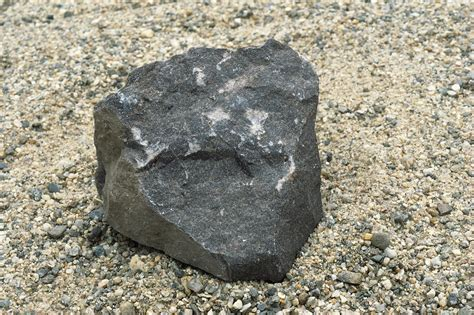

In [163]:
image = ds['train'][5]['image']
image

In [164]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['Basalt', 'Chalk', 'Granite', 'Sandstone', 'Slate'], id=None)

In [165]:
ex = ds['train'][100]
labels.int2str(ex['label'])


'Granite'

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

Filter:   0%|          | 0/249 [00:00<?, ? examples/s]

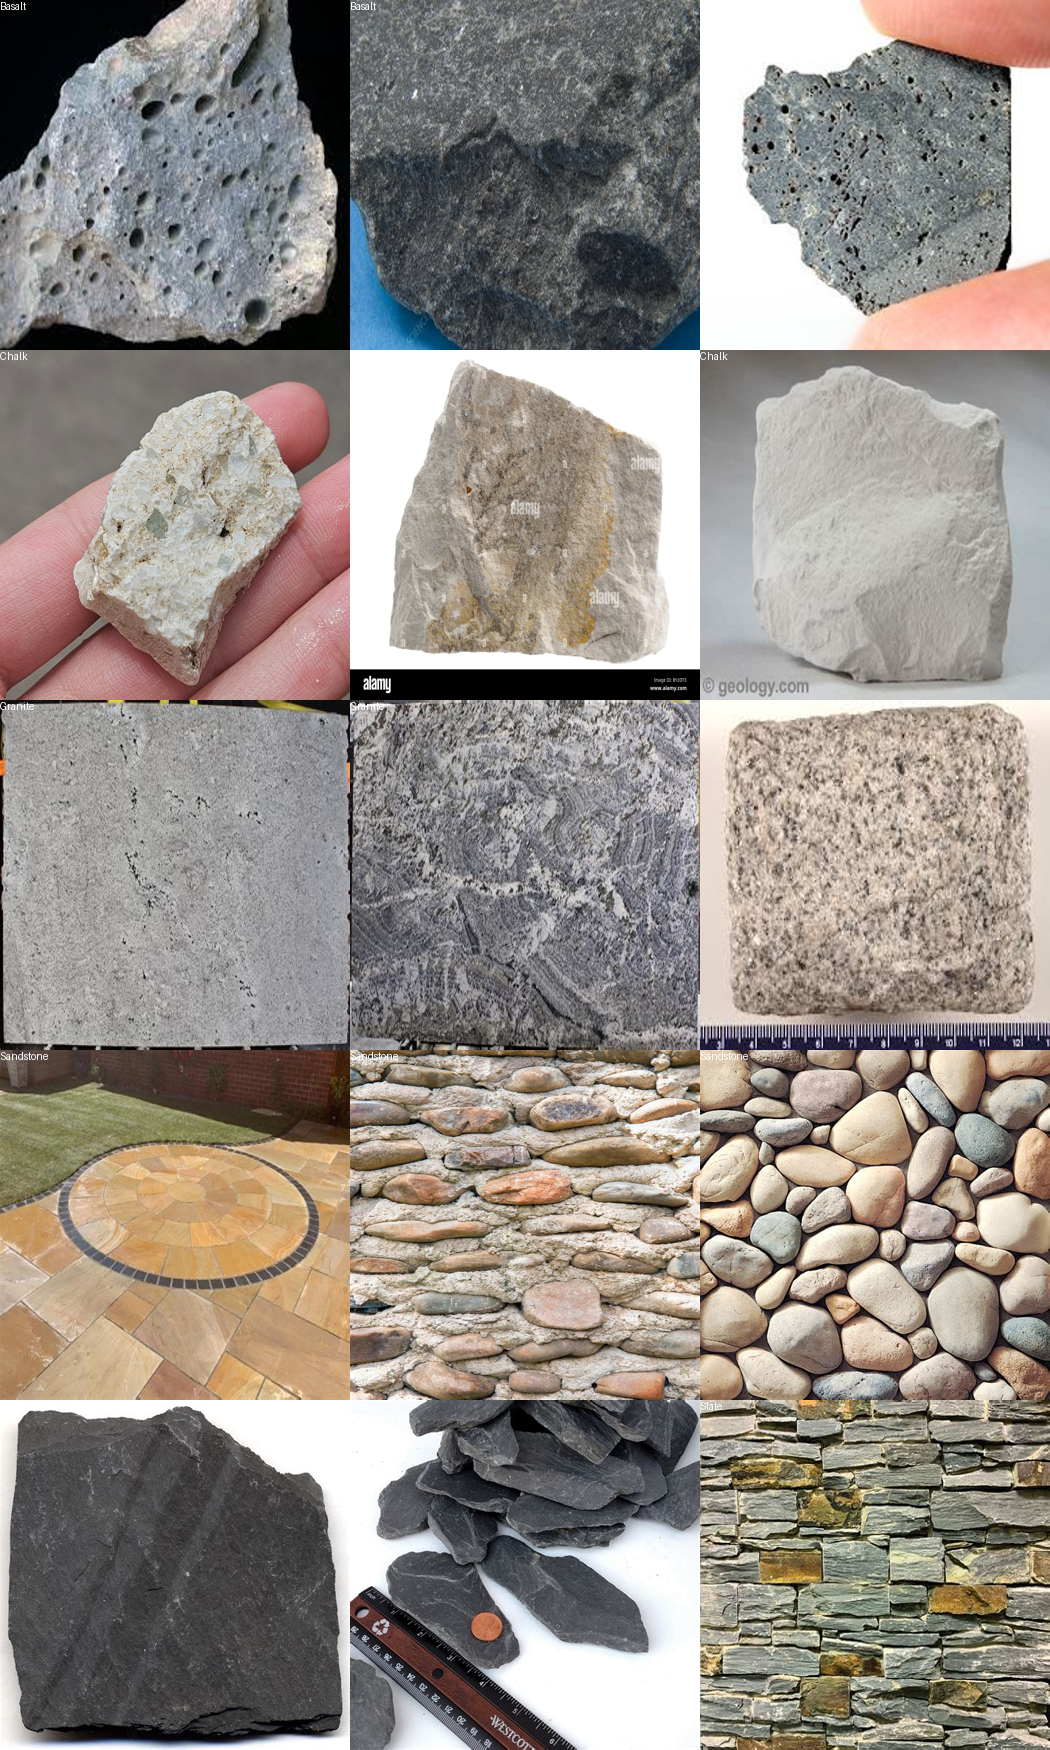

In [166]:
import random
from PIL import ImageDraw, ImageFont, Image

def show_examples(ds, seed: int = 1234, examples_per_class: int = 3, size=(350, 350)):

    w, h = size
    labels = ds['train'].features['label'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(labels) * h))
    draw = ImageDraw.Draw(grid)

    for label_id, label in enumerate(labels):

        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = ds['train'].filter(lambda ex: ex['label'] == label_id).shuffle(seed).select(range(examples_per_class))

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            image = example['image']
            idx = examples_per_class * label_id + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(image.resize(size), box=box)
            draw.text(box, label, (255, 255, 255))

    return grid

show_examples(ds, seed=random.randint(0, 1337), examples_per_class=3)

In [167]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
processor

ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [168]:

processor(image,return_tensors='pt')


{'pixel_values': tensor([[[[ 0.7647,  0.5451,  0.1137,  ...,  0.7804,  0.7647,  0.9373],
          [ 0.6863,  0.4118, -0.0039,  ...,  0.7725,  0.7020,  0.7725],
          [ 0.6314,  0.2157, -0.1294,  ...,  0.7569,  0.5529,  0.5216],
          ...,
          [ 0.7490,  0.4824,  0.3882,  ...,  0.1922,  0.3176,  0.3020],
          [ 0.7255,  0.4118,  0.3098,  ...,  0.2471,  0.3020,  0.1059],
          [ 0.7569,  0.2314,  0.3882,  ...,  0.2706,  0.2314, -0.0745]],

         [[ 0.7725,  0.5529,  0.1137,  ...,  0.7176,  0.7020,  0.8824],
          [ 0.6863,  0.4118, -0.0118,  ...,  0.7098,  0.6392,  0.7098],
          [ 0.6235,  0.2078, -0.1373,  ...,  0.6941,  0.4902,  0.4510],
          ...,
          [ 0.6392,  0.3804,  0.2941,  ...,  0.2078,  0.3333,  0.3098],
          [ 0.5922,  0.2784,  0.1922,  ...,  0.2706,  0.3176,  0.1059],
          [ 0.6157,  0.0980,  0.2627,  ...,  0.2941,  0.2471, -0.0824]],

         [[ 0.5373,  0.3255, -0.0980,  ...,  0.6392,  0.5922,  0.7569],
          [ 0

In [169]:
def process_example(example):
    inputs = processor(example['image'], return_tensors='pt')
    inputs['label'] = example['label']
    return inputs

In [170]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.6706,  0.6627,  0.6784],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.6627,  0.6549,  0.6706],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.6549,  0.6471,  0.6471],
          ...,
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ..., -0.0039, -0.0118, -0.0118],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0118, -0.0196, -0.0196],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0196, -0.0275, -0.0431],
          ...,
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6000,  0.6000,  0.5765],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6078,  0.6078,  0.6000],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6235,  0.6314,  0.6157]],

         [[ 1.0000,  1.0000,  1.0000,  ..., -0.2000, -0.2078, -0.1843],
          [ 1

In [171]:


def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['label'] = example_batch['label']
    return inputs

In [172]:
prepared_ds = ds.with_transform(transform)

prepared_ds['train'][0:2]



{'pixel_values': tensor([[[[ 1.0000,  1.0000,  1.0000,  ...,  0.6706,  0.6627,  0.6784],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.6627,  0.6549,  0.6706],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.6549,  0.6471,  0.6471],
          ...,
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9765,  0.9765,  0.9765,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 1.0000,  1.0000,  1.0000,  ..., -0.0039, -0.0118, -0.0118],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0118, -0.0196, -0.0196],
          [ 1.0000,  1.0000,  1.0000,  ..., -0.0196, -0.0275, -0.0431],
          ...,
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6000,  0.6000,  0.5765],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6078,  0.6078,  0.6000],
          [ 0.9922,  0.9922,  0.9922,  ...,  0.6235,  0.6314,  0.6157]],

         [[ 1.0000,  1.0000,  1.0000,  ..., -0.2000, -0.2078, -0.1843],
          [ 1

# Training & Eval

Create a collate function to define the batches. We'll just use the keys from the dictionaries that are coming in lists.

In [173]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [174]:
import numpy as np

import evaluate
metric = evaluate.load("accuracy")


def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


In [175]:
from transformers import ViTForImageClassification

import torch



labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [176]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-rocks",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=8,
  fp16=False,           # Ensure fp16 is disabled
  bf16=True,            # Enable bf16 mixed-precision
  save_steps=10,
  eval_steps=10,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)


In [177]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["validation"],
    tokenizer=processor,
)

/var/folders/xp/x_627t793ldf5frt1pjyvns40000gn/T/ipykernel_41657/3439825433.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [178]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

***** train metrics *****
  epoch                    =         8.0
  total_flos               = 143766583GF
  train_loss               =      0.4426
  train_runtime            =  0:01:27.23
  train_samples_per_second =      22.835
  train_steps_per_second   =       1.467


In [179]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        8.0
  eval_accuracy           =     0.7353
  eval_loss               =     0.7321
  eval_runtime            = 0:00:00.70
  eval_samples_per_second =      47.91
  eval_steps_per_second   =      7.046


Matplotlib is building the font cache; this may take a moment.


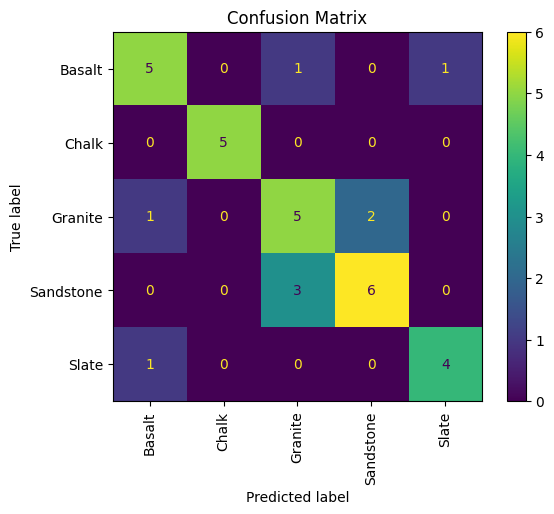

In [186]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from transformers import Trainer

# Assuming you have a trained Trainer object and a validation dataset ready
# Make sure your prepared_ds['validation'] is correctly setup with input features and true labels

# Predict with Hugging Face's Trainer
predictions = trainer.predict(prepared_ds['validation'])

# Extract predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Use `ConfusionMatrixDisplay` to plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trainer.model.config.id2label.values())
disp.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='vertical', values_format=None)
plt.title('Confusion Matrix')
plt.show()

In [180]:
kwargs = {
    "finetuned_from": model.config._name_or_path,
    "tasks": "image-classification",
    "dataset": 'rocks',
    "tags": ['image-classification'],
}

trainer.push_to_hub('🍻 cheers', **kwargs)

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

events.out.tfevents.1739963389.Andrews-MacBook-Pro.local.41657.6:   0%|          | 0.00/10.3k [00:00<?, ?B/s]

events.out.tfevents.1739964338.Andrews-MacBook-Pro.local.41657.9:   0%|          | 0.00/411 [00:00<?, ?B/s]

events.out.tfevents.1739963830.Andrews-MacBook-Pro.local.41657.7:   0%|          | 0.00/5.16k [00:00<?, ?B/s]

Upload 6 LFS files:   0%|          | 0/6 [00:00<?, ?it/s]

events.out.tfevents.1739964247.Andrews-MacBook-Pro.local.41657.8:   0%|          | 0.00/11.8k [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.30k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/Andrew-Finch/vit-base-rocks/commit/e28250c3cfdf9a9e773d92c2d914edcee137848e', commit_message='🍻 cheers', commit_description='', oid='e28250c3cfdf9a9e773d92c2d914edcee137848e', pr_url=None, repo_url=RepoUrl('https://huggingface.co/Andrew-Finch/vit-base-rocks', endpoint='https://huggingface.co', repo_type='model', repo_id='Andrew-Finch/vit-base-rocks'), pr_revision=None, pr_num=None)